In [63]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import sys, os
import matplotlib.pyplot as plt
%matplotlib inline

cd = os.path.split(os.getcwd())[0]
if cd not in sys.path:
    sys.path.append(cd)

from lib import noaa, bexarcrime

In [64]:
dfw = noaa.noaa_from_web_small() # weather database handle

In [13]:
dfc = bexarcrime.crime_from_web() # crime database handle

In [14]:
dfc = bexarcrime.get_violent_crime(bexarcrime.crime_from_web())
dfc

KeyboardInterrupt: 

Drop all useless columns from the crime dataframe

In [ ]:
dfc = dfc.drop(['CASE-CAUSE-NBR', 'FULL-NAME', 'ADDR-CITY', 'ADDR-STATE','ADDR-ZIP-CODE','OFFENSE-DESC','OFFENSE-TYPE',
               'REDUCED-OFFENSE-CODE','REDUCED-OFFENSE-DESC','REDUCED-OFFENSE-TYPE','LOCATION','CUSTODY-DATE','BOND-DATE',
               'BOND-STATUS','BOND-AMOUNT'],axis = 1)

Replace all values used to represent NULL

In [65]:
dfw['Temperature'] = dfw['Temperature'].replace(9999,np.nan)
dfw['Pressure'] = dfw['Pressure'].replace(99999,np.nan)
dfw['Humidity'] = dfw['Humidity'].replace(999, np.nan)
dfw['Sky'] = dfw['Sky'].replace([9,99], np.nan)

Scale the data

In [66]:
dfw['Temperature'] = dfw['Temperature'].map(lambda x : x/10)
dfw['Pressure'] = dfw['Pressure'].map(lambda x : x/10)
dfw['Sky'] = dfw['Sky'].map(lambda x : x/8)

Convert the Temperature to Farenheit

In [67]:
dfw['Temperature'] = dfw['Temperature'].map(lambda x : x * 9/5 + 32)
dfw

,Date,Temperature,Pressure,Humidity,RHPeriod,Sky
0,2016-01-01 00:00:00,53.06,1024.5,NaN,NaN,1.00
1,2016-01-01 00:51:00,53.06,1024.9,NaN,NaN,NaN
2,2016-01-01 01:51:00,51.98,1025.6,NaN,NaN,NaN
3,2016-01-01 02:51:00,51.98,1026.3,NaN,NaN,NaN
4,2016-01-01 03:00:00,51.98,1026.3,NaN,NaN,1.00
5,2016-01-01 03:51:00,51.08,1026.2,NaN,NaN,NaN
6,2016-01-01 04:51:00,51.08,1026.8,NaN,NaN,NaN
7,2016-01-01 05:51:00,50.00,1026.2,NaN,NaN,NaN
8,2016-01-01 05:59:00,NaN,NaN,66.0,2.0,NaN
9,2016-01-01 05:59:00,NaN,NaN,NaN,NaN,NaN


Group the weather data by the average for a day

In [68]:
dailyaverage = dfw.groupby([dfw.Date.dt.year, dfw.Date.dt.month, dfw.Date.dt.day]).mean()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ca94940>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1199ac470>], dtype=object)

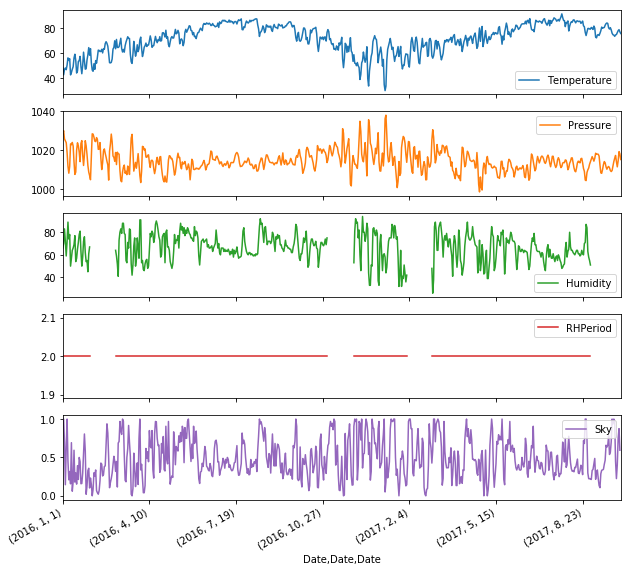

In [69]:
dailyaverage.plot(subplots=True, sharex=True, figsize=[10,10])